In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import cv2

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

#from tensorflow.keras.models import Sequential
#from tensorflow.keras.callbacks import EarlyStopping


In [2]:
# Base directory depuis le home de l'utilisateur
home_dir = os.path.expanduser("~")
base_dir = os.path.join(home_dir, "Documents", "Porfolio", "Data Science", "Dogs_vs_cats")

train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test1")

## Prétraitemen

In [ ]:
image_size = (150, 150)
batch_size = 32

# Data augmentation pour le train
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [4]:
print(val_generator.class_indices)

{'cats': 0, 'dogs': 1}


## Modèle CNN

In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Entraînement

In [ ]:
early_stop = EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, min_lr=1e-5)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=[early_stop, reduce_lr]
)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 337ms/step - accuracy: 0.5361 - loss: 0.6956 - val_accuracy: 0.5726 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 204s 326ms/step - accuracy: 0.5924 - loss: 0.6677 - val_accuracy: 0.6780 - val_loss: 0.6025 - learning_rate: 0.0010
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.6940 - loss: 0.5828 - val_accuracy: 0.7438 - val_loss: 0.5077 - learning_rate: 0.0010
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 318ms/step - accuracy: 0.7530 - loss: 0.5094 - val_accuracy: 0.7890 - val_loss: 0.4529 - learning_rate: 0.0010
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.7772 - loss: 0.4629 - val_accuracy: 0.7866 - val_loss: 0.4450 - learning_rate: 0.0010
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 199s 319ms/step - accuracy: 0.8008 - loss: 0.4338 - val_accuracy: 0.8210 - val_loss: 0.3977 - learning_rate: 0.0010
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 200s 320ms/step - accura

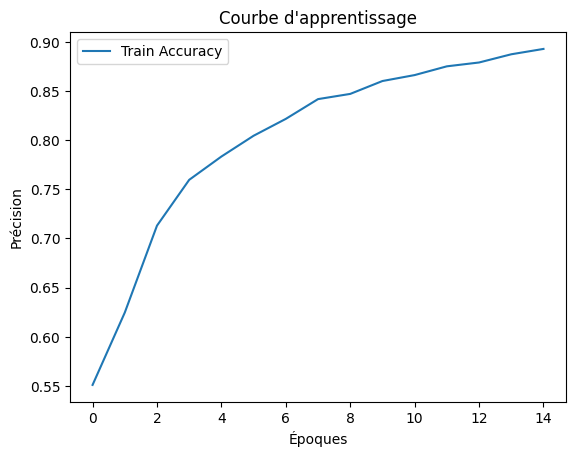

In [9]:
# === Sauvegarde du modèle ===
model_path = os.path.join(base_dir, "dog_cat_classifier.h5")
model.save(model_path)

# === Courbes d'apprentissage ===
plt.plot(history.history['accuracy'], label='Train Accuracy')
#plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Courbe d'apprentissage")
plt.xlabel("Époques")
plt.ylabel("Précision")
plt.show()

## Prédictions sur l'ensemble de validation

In [15]:
val_generator_eval = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation',
    shuffle=False
)

Found 5000 images belonging to 2 classes.


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 169ms/step


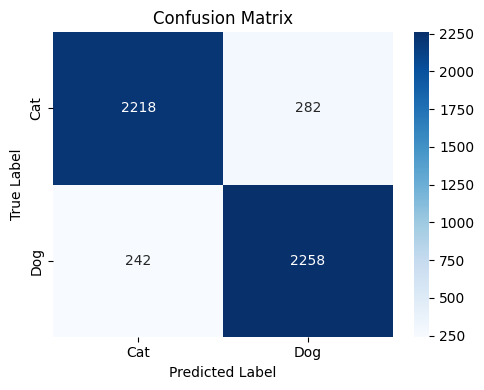

=== Classification Report ===
              precision    recall  f1-score   support

         Cat       0.90      0.89      0.89      2500
         Dog       0.89      0.90      0.90      2500

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

=== Accuracy globale : 89.52%


In [ ]:
# === Prédictions sur l'ensemble de validation ===

val_generator_eval.reset()
y_true = val_generator_eval.classes
y_pred_probs = model.predict(val_generator_eval, verbose=1)
y_pred = (y_pred_probs > 0.5).astype(int).ravel()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix") 
plt.tight_layout()
plt.show()

# Classification report
print("=== Classification Report ===")
print(classification_report(y_true, y_pred, target_names=['Cat', 'Dog']))

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"=== Accuracy globale : {accuracy:.2%}")



In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,123 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Prediction from a test image selected by the user

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

=== Résultat ===
Image analysée : C:\Users\User\Documents\Porfolio\Data Science\Dogs_vs_cats\test1\40.jpg
Prédiction : Cat (score : 0.04)


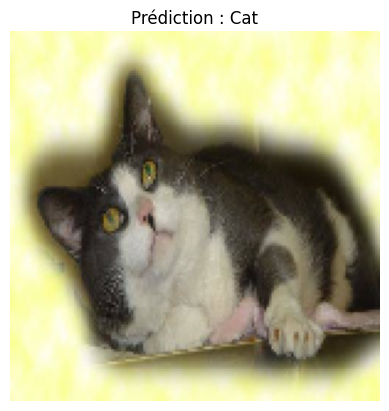

In [ ]:

# === Paramètres ===
img_size = (150, 150)  # Taille d'entrée du modèle
model_path = os.path.join(base_dir, "dog_cat_classifier.h5")
model = load_model(model_path)

# === Demande de l’utilisateur ===
img_num = input("Entrez le numéro de l'image (ex: 4 pour test1\\4.jpg) : ")
img_path = os.path.join(test_dir, f"{img_num}.jpg")

# === Prétraitement ===
img = image.load_img(img_path, target_size=img_size)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

# === Prédiction ===
prediction = model.predict(img_array)[0][0]
label = "Dog" if prediction > 0.5 else "Cat"

# === Résultat ===
print("\n=== Résultat ===")
print(f"Image analysée : {img_path}")
print(f"Prédiction : {label} (score : {prediction:.2f})")

# === Affichage de l’image ===
plt.imshow(img)
plt.title(f"Prédiction : {label}")
plt.axis("off")
plt.show()